In [21]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars_sampled.csv')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [3]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [4]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

<AxesSubplot:>

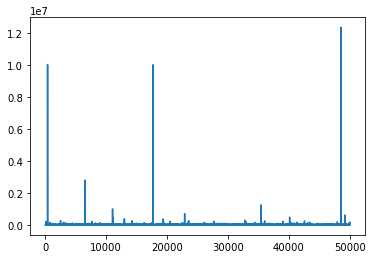

In [6]:
df["price"].plot()

<AxesSubplot:>

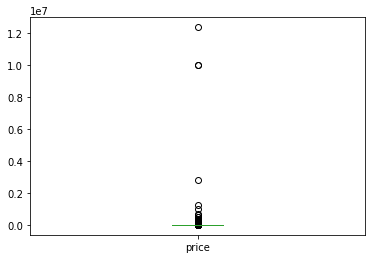

In [7]:
df["price"].plot.box()

In [8]:
# Убираем выбросы
for x in ["price"]:
    q75,q25 = np.percentile(df.loc[:, x], [75, 25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min, x] = np.nan
    df.loc[df[x] > max, x] = np.nan

<AxesSubplot:>

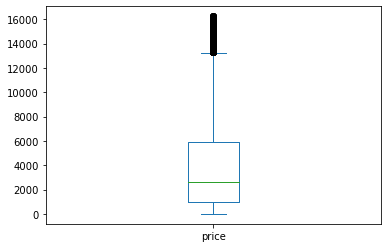

In [9]:
df["price"].plot.box()

In [10]:
df['price'] = np.log(df['price']+1) # Нормализуем с помощью log

In [11]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.000000,0.005603,0.096838,-0.108628,0.170537,0.068389
yearOfRegistration,0.005603,1.000000,-0.004394,-0.064188,-0.023152,-0.001615
powerPS,0.096838,-0.004394,1.000000,-0.016447,0.034345,0.017415
kilometer,-0.108628,-0.064188,-0.016447,1.000000,0.001985,-0.024076
monthOfRegistration,0.170537,-0.023152,0.034345,0.001985,1.000000,0.019050
postalCode,0.068389,-0.001615,0.017415,-0.024076,0.019050,1.000000


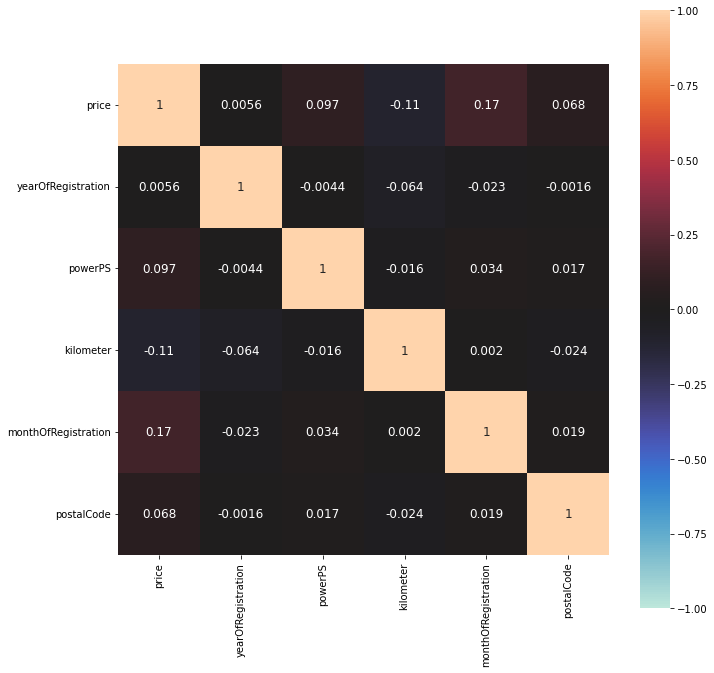

In [12]:
ax = sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11) # Факторы слабо коррелируют с целевой функцией price

<AxesSubplot:xlabel='gearbox', ylabel='price'>

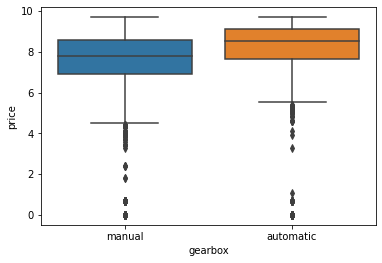

In [13]:
sns.boxplot(x=df["gearbox"], y=df["price"]) # Авто с автоматической коробкой передач дороже

<AxesSubplot:xlabel='fuelType', ylabel='price'>

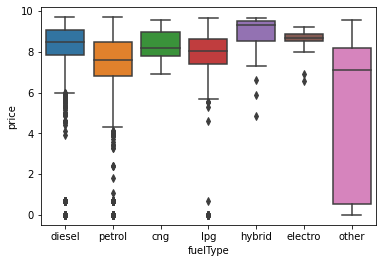

In [14]:
sns.boxplot(x=df["fuelType"], y=df["price"]) # Гибриды дороже всех остальных, бензин - самый популярный

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

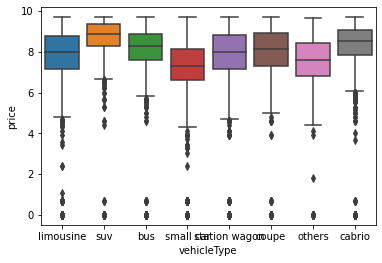

In [15]:
sns.boxplot(x=df["vehicleType"], y=df["price"]) # Внедорожники дороже всех

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

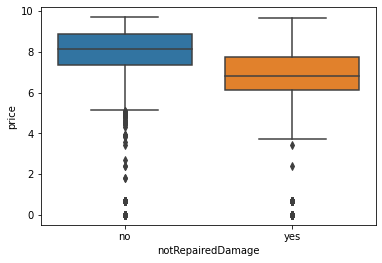

In [16]:
sns.boxplot(x=df["notRepairedDamage"], y=df["price"]) # Авто, которые невозможно восстановить, стоят меньше

In [17]:
nan_series = df.isna().sum()
nan_series[nan_series > 0]

price                3757
vehicleType          5188
gearbox              2824
model                2758
fuelType             4503
notRepairedDamage    9716
dtype: int64

In [18]:
df = df.dropna(subset=["notRepairedDamage"])

/Users/apieceofchalk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


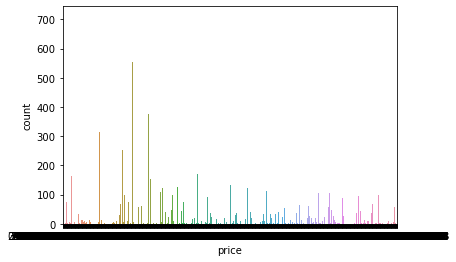

/Users/apieceofchalk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


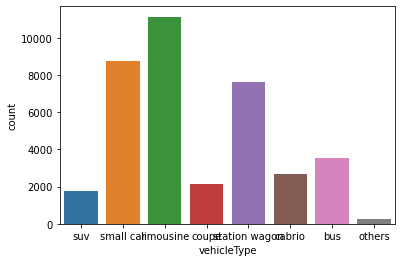

/Users/apieceofchalk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


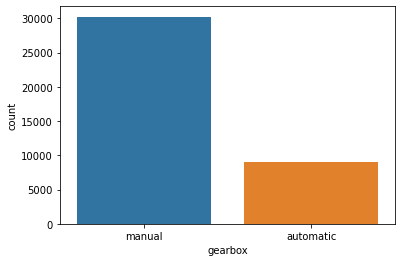

/Users/apieceofchalk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


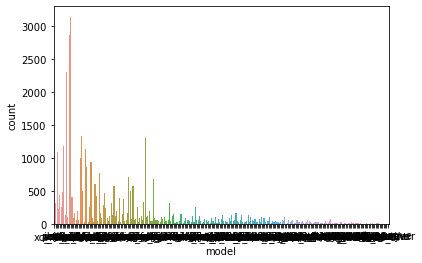

/Users/apieceofchalk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


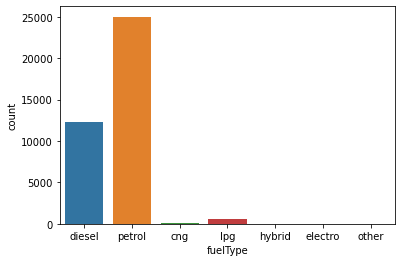

/Users/apieceofchalk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


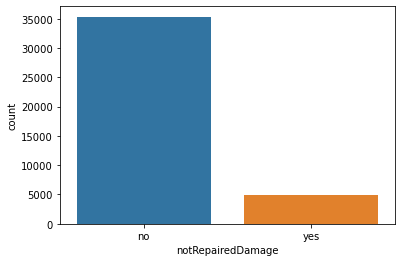

In [22]:
for column in nan_series[nan_series > 0].to_dict().keys():
    sns.countplot(df[column])
    plt.show()

In [23]:
# Выставляем моду
for column in ["fuelType", "gearbox", "vehicleType"]:
    df[column] = df[column].fillna(df[column].value_counts().index[0])

In [24]:
nan_series = df.isna().sum()
nan_series[nan_series >0]

price    3548
model    1519
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,8.412055,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,6.896694,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2/4/2016 0:00,26826,2/4/2016 12:51
7,24/03/2016 15:52,Mercedes_Benz_CLK_Coupe_200,private,offer,7.244228,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,24/03/2016 0:00,13353,27/03/2016 12:45
8,28/03/2016 14:40,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,8.451267,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,28/03/2016 0:00,28307,6/4/2016 18:19
